In [1]:
import pandas as pd
import math
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")    # Ignore warnings

ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
sb.set(style="darkgrid")
ibm.dropna(inplace=True)
ibm.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


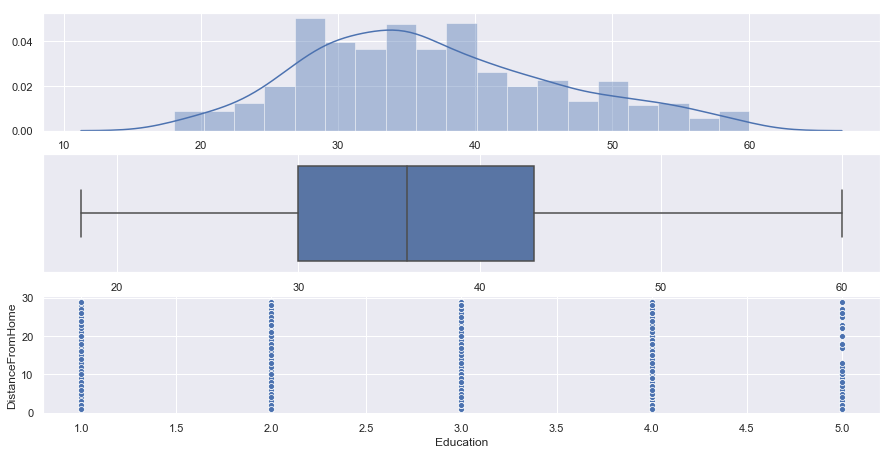

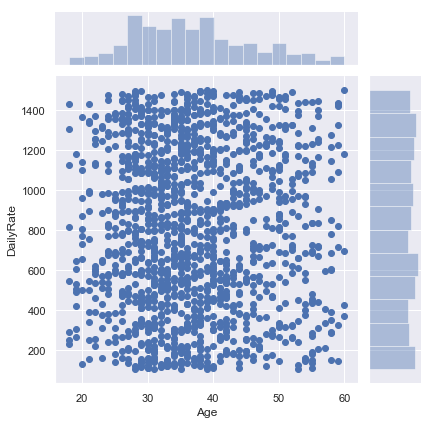

In [2]:
#Choose one variable and plot that variable four different ways.
plt.figure(figsize=(15,10))
plt.subplot(4, 1, 1)
sb.distplot(ibm.Age)
plt.subplot(4, 1, 2)
sb.boxplot(ibm.Age)
plt.subplot(4, 1, 3)
sb.scatterplot(x="Education", y="DistanceFromHome", data=ibm)

sb.jointplot(x="Age", y="DailyRate", data=ibm)
plt.show()

The first plot is a distplot from seaborn and it is used to display the spread of the data in a line and bar plot format. It easily helps readers visualize the variance of the data in a very simple format. However it can only take data from two points which variable and not categorical, making its uses somewhat limited.

Boxplots are great at showing the mean of the data as well as where the largest cluster of datapoints are. In effect it is very similar to a scatterplot, but with larger datasets it's visualization of the data is cleaner and less cluttered then the scatter plot. It's consenquence lies in not being able to show you any information in regards to how severe the outliers skews the mean and how many datas are outliers.

Scatterplots are similar to boxplots but they give more information in regards to outlier influence on the data. Scatterplots can also be used as a base to plot a line of best fit and to help find co-relation between two different variable data sets. Although its use in the data I have given isn't too useful, I wanted to demostrate that I could use it.

Jointplots are a combination of a scatter and bar plots and they are a cool way to help readers to visualize the variance of the two variable datas thrown in as well as help illustrate any common point between the two data sets. 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

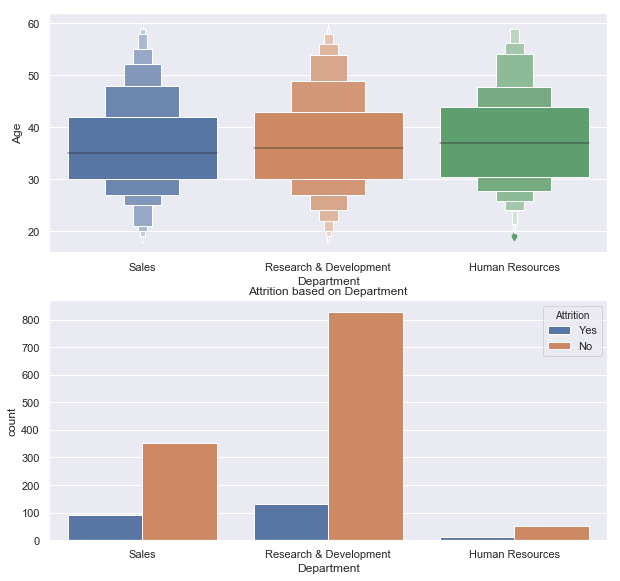

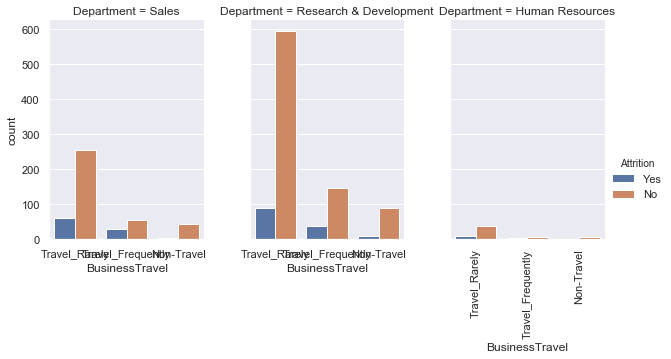

In [3]:
#Choose two continuous variables, and plot them three different ways.
plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1)
sb.boxenplot(x="Department", y="Age", data=ibm)
plt.subplot(3, 1, 2)
sb.countplot(data=ibm, x="Department", hue="Attrition")
plt.title('Attrition based on Department')

sb.catplot(x="BusinessTravel", hue="Attrition", col="Department", data=ibm, kind="count",height=4, aspect=.7);
#not sure how to make the xtick rotaiton apply to all the graphs on a catplot from seaborn
plt.xticks(rotation=90)


Boxen plots are very similar to Box plots, only that they take 3 data sets instead of 2. They are a great way to display averages of datas between Categorical and Variable data sets and helps the readers see the similarities between them. They show more information in regards to outlier data compared to Box plots.

Countplots are great variances of categorical data that have limited inputs, such as yes/no answers or answers based on dates etc. They are strong in helping readers to see disparity within a certain header and in this case, help compare the difference of attrition rate for the employees in the department.

Catplots are similar to countplots, however they take an additional data set to create additional graphs to view. In this way, its like an upgraded version of Countplot but also can overwhelm the reader due to the many graphs it provides. Thus its use should be limited to a more general use, such as introducing a problem more then trying to detail to the reader exactly what the problem is.

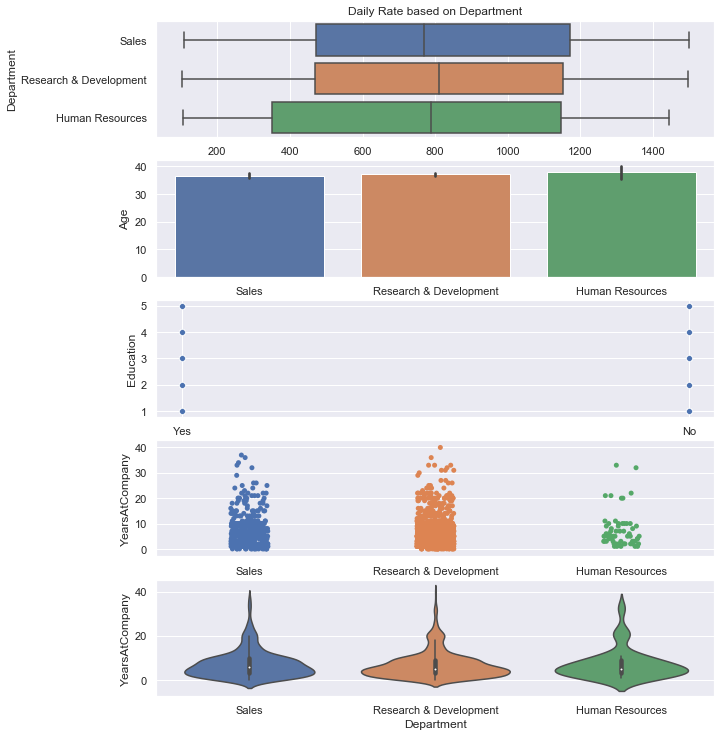

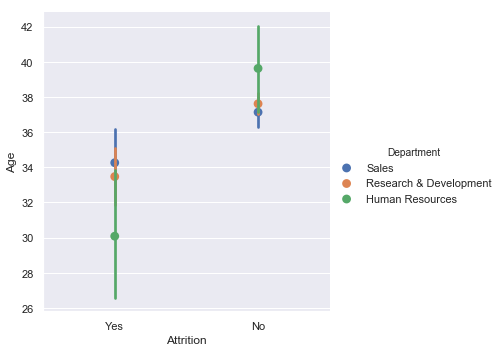

In [6]:
#Choose one continuous variable and one categorical variable, and plot them six different ways.
plt.figure(figsize=(10,15))
plt.subplot(6, 1, 1)
sb.boxplot(x=ibm.DailyRate, y=ibm.Department)
plt.title('Daily Rate based on Department')
plt.subplot(6, 1, 2)
sb.barplot(x="Department", y="Age", data=ibm)
plt.subplot(6, 1, 3)
sb.scatterplot(x="Attrition", y="Education", data=ibm)
plt.subplot(6, 1, 4)
sb.stripplot(x="Department", y='YearsAtCompany', data=ibm)
plt.subplot(6, 1, 5)
sb.violinplot(x="Department", y="YearsAtCompany", data=ibm)

sb.factorplot(x="Attrition", y="Age", hue="Department", data=ibm, kind="point", join=False)

Boxplots used with variable and categorical data is good for comparing the averages between different classes. 

Barplots used with categorical and variable data can only display the difference in max values, it does not show the degree of variance or averages in regards to the different categories and thus is not very effective in this situation.

Scatter plots when used with categorical and variable data isn't too effective (as illustrated by the scatter plot shown here), it is much more effective to use a boxplot, factorplot or violin plot to better illustrate what a scatterplot can illustrate here.

Stripplot shows an interesting cluster like scatter plot and can be used to effectively show the variance within a certain category of data. It is great for showing outliers in data as well as show where most of the data is clustered together.

Violinplots are very similar to the boxen or box plots, just displayed in a more fluid way. They share the same weakness as boxplots.

Joinplots are great at comparing averages and degree of variance between different data, they however fall short at displaying finer details in regards to the outlier. 